In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_pca0_cv = pd.read_csv("results/scores_krr_pca__pca0.csv")
df_pca1_cv = pd.read_csv("results/scores_krr_pca__pca1.csv")
df_pca2_cv = pd.read_csv("results/scores_krr_pca__pca2.csv")

df_pca0_non_cv = pd.read_csv("results/replicate/scores_ridge_varimax_satisf_.csv")
df_pca1_non_cv = pd.read_csv("results/replicate/scores_ridge_varimax_cog_.csv")
df_pca2_non_cv = pd.read_csv("results/replicate/scores_ridge_varimax_er_.csv")

df_pca0_non_cv_noRotator = pd.read_csv("results/replicate/scores_ridge_noRotator_varimax_satisf.csv")
df_pca1_non_cv_noRotator = pd.read_csv("results/replicate/scores_ridge_noRotator_varimax_cog.csv")
df_pca2_non_cv_noRotator = pd.read_csv("results/replicate/scores_ridge_noRotator_varimax_er.csv")

df_pca0_leakage_noRotator = pd.read_csv("results/scores_pca_leakage_noRotator_krr_varimax_satisf.csv")
df_pca1_leakage_noRotator = pd.read_csv("results/scores_pca_leakage_noRotator_krr_varimax_cog.csv")
df_pca2_leakage_noRotator = pd.read_csv("results/scores_pca_leakage_noRotator_krr_varimax_er.csv")

data_r_corr_cv = {
    'dissatisfaction' : df_pca0_cv["test_r_corr"],
    'cognition' : df_pca1_cv["test_r_corr"],
    'emotion' : df_pca2_cv["test_r_corr"],
    'cvkind': "CV_noRotator",
}

data_r2_corr_cv = {
    'dissatisfaction' : df_pca0_cv["test_r2_corr"],
    'cognition' : df_pca1_cv["test_r2_corr"],
    'emotion' : df_pca2_cv["test_r2_corr"],
    'cvkind': "CV_noRotator",
}

data_r_corr_non_cv = {
    'dissatisfaction' : df_pca0_non_cv["test_r_corr"],
    'cognition' : df_pca1_non_cv["test_r_corr"],
    'emotion' : df_pca2_non_cv["test_r_corr"],
    'cvkind': "non_CV",
}

data_r2_corr_non_cv = {
    'dissatisfaction' : df_pca0_non_cv["test_r2_corr"],
    'cognition' : df_pca1_non_cv["test_r2_corr"],
    'emotion' : df_pca2_non_cv["test_r2_corr"],
    'cvkind': "non_CV",
}

data_r_corr_non_cv_noRotator = {
    'dissatisfaction' : df_pca0_non_cv_noRotator["test_r_corr"],
    'cognition' : df_pca1_non_cv_noRotator["test_r_corr"],
    'emotion' : df_pca2_non_cv_noRotator["test_r_corr"],
    'cvkind': "non_CV_noRotator",
}

data_r2_corr_non_cv_noRotator = {
    'dissatisfaction' : df_pca0_non_cv_noRotator["test_r2_corr"],
    'cognition' : df_pca1_non_cv_noRotator["test_r2_corr"],
    'emotion' : df_pca2_non_cv_noRotator["test_r2_corr"],
    'cvkind': "non_CV_noRotator",
}

data_r_corr_leakage_noRotator = {
    'dissatisfaction' : df_pca0_leakage_noRotator["test_r_corr"],
    'cognition' : df_pca1_leakage_noRotator["test_r_corr"],
    'emotion' : df_pca2_leakage_noRotator["test_r_corr"],
    'cvkind': "Leakage_noRotator",
}

data_r2_corr_leakage_noRotator = {
    'dissatisfaction' : df_pca0_leakage_noRotator["test_r2_corr"],
    'cognition' : df_pca1_leakage_noRotator["test_r2_corr"],
    'emotion' : df_pca2_leakage_noRotator["test_r2_corr"],
    'cvkind': "Leakage_noRotator",
}

df_r_corr_cv_noRotator = pd.DataFrame(data_r_corr_cv)
df_r2_corr_cv_noRotator = pd.DataFrame(data_r2_corr_cv)
df_r_corr_non_cv = pd.DataFrame(data_r_corr_non_cv)
df_r2_corr_non_cv = pd.DataFrame(data_r2_corr_non_cv)
df_r_corr_non_cv_noRotator = pd.DataFrame(data_r_corr_non_cv_noRotator)
df_r2_corr_non_cv_noRotator = pd.DataFrame(data_r2_corr_non_cv_noRotator)
df_r_corr_leakage_noRotator = pd.DataFrame(data_r_corr_leakage_noRotator)
df_r2_corr_leakage_noRotator = pd.DataFrame(data_r2_corr_leakage_noRotator)

In [3]:
concatenated_df = pd.concat([df_r_corr_cv_noRotator,df_r_corr_non_cv,df_r_corr_non_cv_noRotator,df_r_corr_leakage_noRotator],ignore_index=True)
concatenated_df = pd.melt(concatenated_df,id_vars=['cvkind'],var_name='component',value_name="Pearson's correlation")
concatenated_df['rotator'] = concatenated_df['cvkind'].apply(lambda x: 'no' if 'noRotator' in x else 'yes')


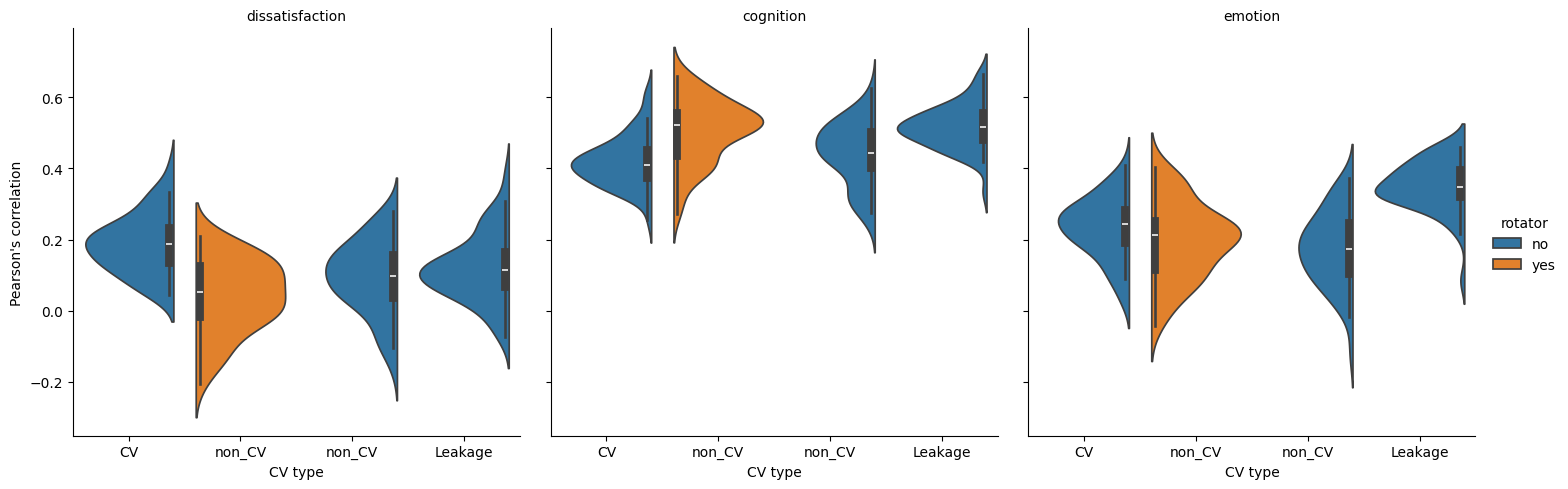

In [ ]:
g = sns.catplot(
    data=concatenated_df, 
    kind="violin", 
    x="cvkind", 
    y="Pearson's correlation",
    col="component",
    hue ="rotator",
    split=True,
    )

# Define x-axis labels
custom_labels = ["CV", "non_CV", "non_CV","Leakage"]

# Set the custom labels
g.set_xticklabels(custom_labels)

g.set_titles("{col_name}")
g.set_axis_labels("CV type","Pearson's correlation")   
plt.show()


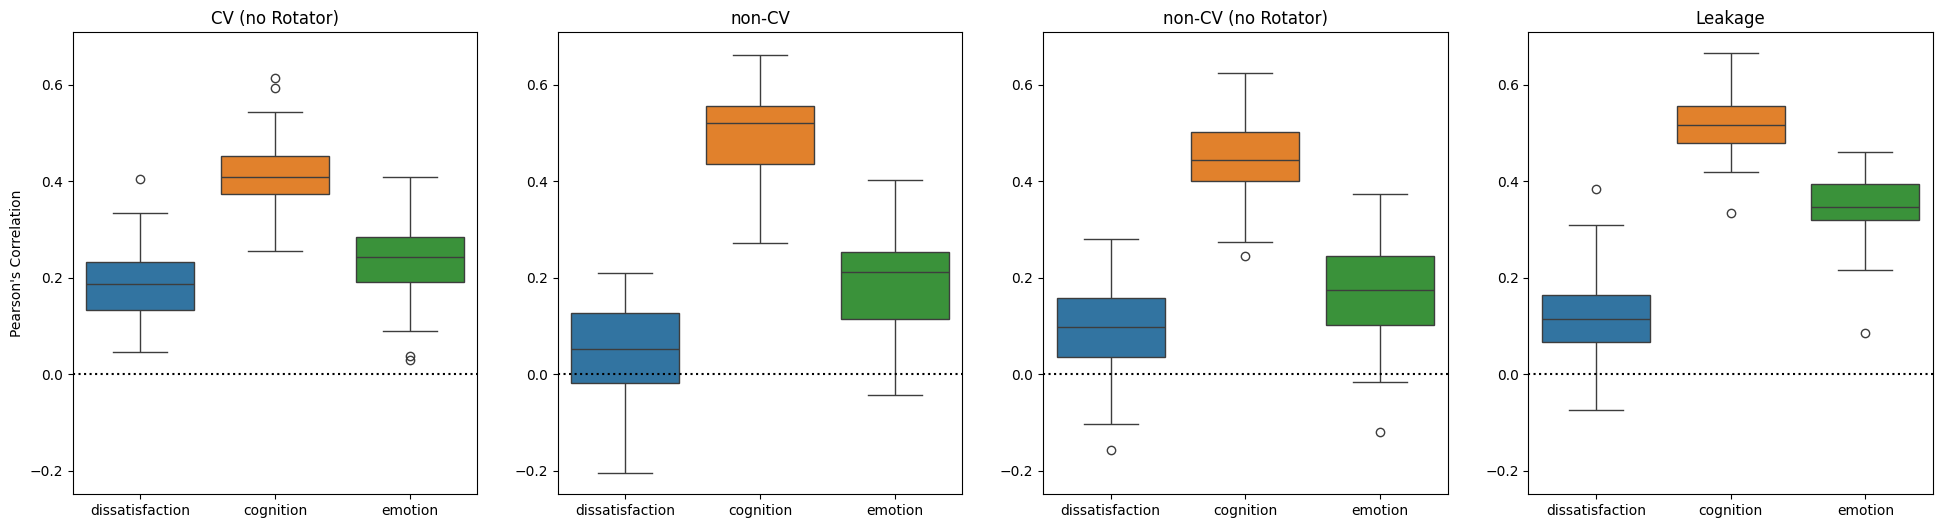

In [6]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(24, 6),sharey=True) 
sns.boxplot(data=df_r_corr_cv_noRotator,ax=ax1)
ax1.set_title("CV (no Rotator)")
ax1.axhline(0, color="k", ls=":")
ax1.set_ylabel("Pearson's Correlation")

sns.boxplot(data=df_r_corr_non_cv,ax=ax2)
ax2.set_title("non-CV")
ax2.axhline(0, color="k", ls=":")
ax2.set_ylabel("Pearson's Correlation")

sns.boxplot(data=df_r_corr_non_cv_noRotator,ax=ax3)
ax3.set_title("non-CV (no Rotator)")
ax3.axhline(0, color="k", ls=":")
ax3.set_ylabel("Pearson's Correlation")

sns.boxplot(data=df_r_corr_leakage_noRotator,ax=ax4)
ax4.set_title("Leakage")
ax4.axhline(0, color="k", ls=":")
ax4.set_ylabel("Pearson's Correlation")

ax2.tick_params(labelleft=True) 
ax3.tick_params(labelleft=True) 
ax4.tick_params(labelleft=True) 
plt.show()



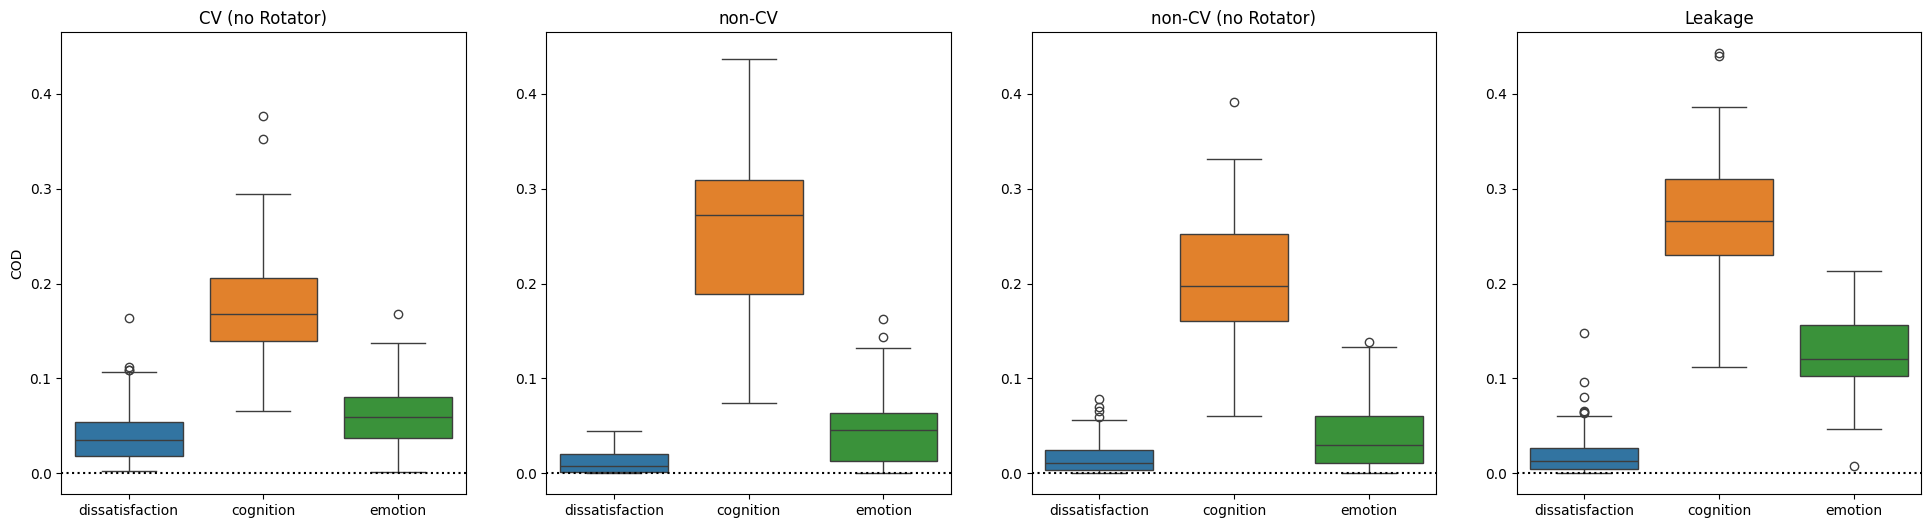

In [7]:
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(24, 6),sharey=True) 
sns.boxplot(data=df_r2_corr_cv_noRotator,ax=ax1)
ax1.set_title("CV (no Rotator)")
ax1.axhline(0, color="k", ls=":")

ax1.set_ylabel("COD")

sns.boxplot(data=df_r2_corr_non_cv,ax=ax2)
ax2.set_title("non-CV")
ax2.axhline(0, color="k", ls=":")

ax2.set_ylabel("COD")

sns.boxplot(data=df_r2_corr_non_cv_noRotator,ax=ax3)
ax3.set_title("non-CV (no Rotator)")
ax3.axhline(0, color="k", ls=":")

ax3.set_ylabel("COD")

sns.boxplot(data=df_r2_corr_leakage_noRotator,ax=ax4)
ax4.set_title("Leakage")
ax4.axhline(0, color="k", ls=":")
ax4.set_ylabel("COD")

ax2.tick_params(labelleft=True) 
ax3.tick_params(labelleft=True) 
ax4.tick_params(labelleft=True) 
plt.show()

